In [1]:
import cv2
import numpy as np
from scipy import ndimage

qrDecoder = cv2.QRCodeDetector()
im = cv2.imread('test qr.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im2 = ndimage.median_filter(im,size=3)
myqr = qrDecoder.detectAndDecode(im2)
myqr

('Halo LPDP',
 array([[[ 33.,  31.],
         [325.,  31.],
         [325., 324.],
         [ 33., 324.]]], dtype=float32),
 array([[  0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0, 255,
           0, 255,   0, 255,   0, 255,   0,   0, 255,   0,   0,   0,   0,
           0,   0,   0],
        [  0, 255, 255, 255, 255, 255,   0, 255,   0, 255, 255, 255,   0,
           0, 255,   0,   0, 255, 255, 255,   0, 255,   0, 255, 255, 255,
         255, 255,   0],
        [  0, 255,   0,   0,   0, 255,   0, 255,   0,   0,   0, 255, 255,
         255,   0, 255,   0,   0, 255,   0,   0, 255,   0, 255,   0,   0,
           0, 255,   0],
        [  0, 255,   0,   0,   0, 255,   0, 255,   0, 255,   0,   0, 255,
           0,   0,   0, 255, 255, 255, 255, 255, 255,   0, 255,   0,   0,
           0, 255,   0],
        [  0, 255,   0,   0,   0, 255,   0, 255,   0,   0,   0, 255,   0,
         255, 255, 255, 255, 255, 255,   0, 255, 255,   0, 255,   0,   0,
           0, 255,   0],
        [  

In [3]:
top = myqr[1][0][0].astype(int)
bottom = myqr[1][0][2].astype(int)+1
top, bottom

(array([33, 31]), array([326, 325]))

In [4]:
qim = im2[top[0]:bottom[0],top[1]:bottom[1]]
print(qim.shape)

(293, 294)


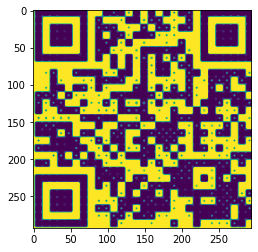

In [46]:
import matplotlib.pyplot as plt
plt.imshow(qim)

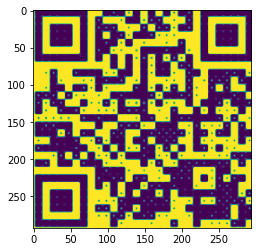

In [40]:
from scipy import ndimage
im2 = ndimage.median_filter(qim,size=3)
plt.imshow(im2)

In [36]:
import numpy as np
qr = np.zeros((29,29))

for y in range(29):
    for x in range(29):
        qr[y,x] = np.median(qim[y*10:(y+1)*10,x*10:(x+1)*10])

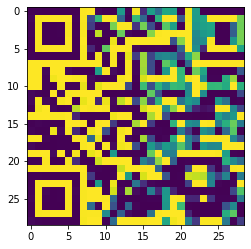

In [37]:
plt.imshow(qr)

In [5]:
data="halo99"
seq="0000000101011100110000000011111010001000011011111001000101000010111101000100100010111001010010100010010001011011010101010001001111101011001001101111100000000101010101010000000111111110001101001111111111000101011000110000110000110001000101101110001011110010000000001111010100010101111101101111000001100110010000100000010011011000100110000010010011100001011001001010000010110100101111010011100111110110010011011101011000000110111111111011111100111000000000000110000100010100100011111011011100101110001001000101001000010000011000100010100100000001111011010001010101000101000001101111101100111011101010110000000110100000100000001"

dots="0000000100111110010000000011111010010010101011111001000101101111010101000100100010100000111110100010010001010100000011010001001111101010011100101111100000000110100000010000000111111111000111001111111100001110010100000000100001101011001101110000001101010110000000110110010000011010111111001011111000010010101011110100000011110100000010100111001010000001000111000000111001010000000010000110101100110111000000110101011000000011011111111110010000011010110000000111110010111110000011111011001010101111010001000101000011110100000010100010101001110010100000010001010100011100000011101111101001010000000010000000000101101011001101110"

In [8]:
import secureqr
secureqr.percentage_matching(data,seq,dots,version=2)

100.0